<a href="https://colab.research.google.com/github/sukritkapil2/Machine-Learning-Projects/blob/main/Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

data_sets_path = 'drive/MyDrive/DataSets/'

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

[0.00000000e+00 1.00001667e+00 2.00003333e+00 ... 5.99980000e+04
 5.99990000e+04 6.00000000e+04]


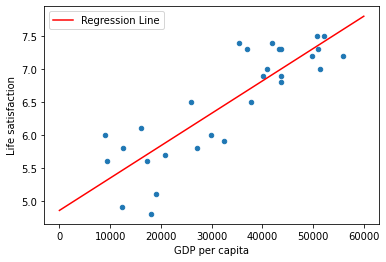

[[5.96242338]]


In [23]:
oecd_bli = pd.read_csv(data_sets_path + '/oecd_bli_2015.csv', thousands = ',')
gdp_per_capita = pd.read_csv(data_sets_path + 'gdp_per_capita.csv', thousands = ',', delimiter = '\t', encoding='latin1', na_values='n/a')

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind="scatter", x="GDP per capita", y = "Life satisfaction")

model = sklearn.linear_model.LinearRegression()

model.fit(X, y)

x = np.linspace(0, 60000, 60000)

y_line = model.intercept_ + model.coef_[0] * x
plt.plot(x, y_line, '-r', label="Regression Line")
plt.legend(loc='upper left')
plt.show()

X_new = [[22587]]

print(model.predict(X_new))